<a id='inizio'></a>
# Evaluating

In this notebook we'll present you the mainly topics about evaluating performance and structurized the machine learning processes.
<br><br>
This notebook will present the following topics:
- [Choosing the Right Estimator](#right_estimator)<a href='#right_estimator'></a> <br>
- [Confusion Matrix](#conf_matrix)<a href='#conf_matrix'></a> <br>
- [Scoring](#scoring)<a href='#scoring'></a>
- [Cross-Validation](#cross_validation)<a href='#cross_validation'></a>
- [Power-Tuning](#power_tuning)<a href='#power_tuning'></a>
- [Pipeling](#pipeling)<a href='#pipeling'></a>


<a id='right_estimator'></a>
### Choosing the right estimator
Typically, algorithm choice is dictated by a balance of factors: <br>
- The dimensionality of your data; <br>
- The geometric nature of your data; <br>
- The types of features used to represent your data; <br>
- The number of training samples you have at your disposal; <br>
- The required training and prediction speeds needed for your purposes; <br>
- The predictive accuracy level desired; <br>
- How configurable you need your model to be; <br>

The following flow-chart describes the circumstances under which you should use the different machine learning algorithms:
<img src='Algorithm Cheat Sheet.jpg'>
<img src='ScikitLearn_Map.png'>
<br>
[Click here to return to the top of the pag](#inizio)<a href='#inizio'>

<a id='conf_matrix'></a>
### Confusion Matrix
A universal method you can use to deeply study how well any of your supervised learning predictors is doing is by using a **confusion matrix**. <br>
A confusion matrix displays your model's predicted (**testing set**) outputs against the true observational values.<br>
This helps you see how well your algorithm was able to generalize and identify specific target labels, along with which labels were often
confused. <br>
This can be helpful in increasing your accuracy, because you can then engineer additional features that help to better identify highly confusing targets, and then take another run through your data analysis pipeline. <br>
Traditionally, the predicted targets are aligned on the X-axis of the matrix, and the true values are aligned on the Y-axis. Let's say you have the following data:

In [1]:
import sklearn.metrics as metrics

y_true = [1,1,2,2,3,3] # Actual, observed testing dataset values
y_pred = [1,1,1,3,2,3] # Predicted values from your model

The true labels are encoded data representing cats, dogs, and monkeys, for the three values. <br>
You can compute a confusion matrix using SciKit-Learn as follows:

In [2]:
metrics.confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [1, 0, 1],
       [0, 1, 1]], dtype=int64)

Perhaps a clearer representation of the data would look like this:
<img src='example.jpg'>
<br>
You can derive quite a bit of information from your confusion matrix. <br>
The first is how many actual cats, dogs, and monkeys you have. By summing up the values in a row, you'll know the true count of your data. <br>
You can do similarly with the columns, to see how many times your model predicted a certain target. <br>
By adding up all the values in the Predicted Dog column, we can see our model thought our testing dataset only had a single dog in it. <br>
An important thing to realize is that all of the non-diagonal elements
of the matrix correspond to misclassified targets.<br>
Given all this information, you're able to derive probabilities relating to how accurate your answers are. 
<br>
<br>
Given the example above, your algorithm predicted there were two cats in the dataset, and there indeed were two cats. In fact, the two samples the algorithm believed to be cats turned out to be the actual cats. It looks like the model is very good at identifying cats.
<br>
<br>
On the other hand, there were two dogs in the dataset. The model somehow came to the conclusion that one of the monkey's was a dog, and din't even arrive at two dog predictions. It looks like you trained a non-dog friendly model. Regarding monkeys, there were two in the dataset. One of them, the algorithm predicted correctly. The other, the model thought was a dog. It looks like there is some level of confusion here between monkeys and dogs. This is a good indicator that you might consider adding additional feature to your dataset, such as banana-affinity.

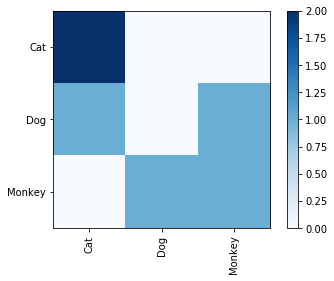

In [4]:
import matplotlib.pyplot as plt

columns = ['Cat', 'Dog', 'Monkey']
confusion = metrics.confusion_matrix(y_true, y_pred)

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2], columns, rotation='vertical')
plt.yticks([0,1,2], columns)
plt.colorbar()

plt.show()

[Click here to return to the top of the pag](#inizio)<a href='#inizio'>

<a id='scoring'></a>
### Scoring
There are some concepts that come into play when evaluating the machine learning models. <br>
They are different as we use classification models, regression, clustering and so on.<br>
Starting with classification models is important understand that when a model try to predict a label of a dataset it is possible to identify the prediction as:
- **True positive**: when the item is correctly labeled as belonging to the positive class;
- **True negative**: when the item is correctly labeled as belonging to the negative class;
- **False positive**: when item is incorrectly labeled as belonging to the positive class;
- **False negative**: when item isn't labeled as belonging to the positive class but should have been.

In a classification task, the **precision** (also called _**positive predictive value**_) _for a class is the number of true positives divided by the total number of elements labeled as belonging to the positive class_ (i.e. the sum of true positives and false positives).<br>
**Recall** (also called _**sensitivity**_) _is defined as the number of true positives divided by the total number of elements that actually belong to the positive class_ (i.e. the sum of true positives and false negatives).<br>
<img src='Precisionrecall.svg'> <br>
A *precision* score of 1.0 for a class C means that every item labeled as belonging to class C does indeed belong to class C (but says nothing about the number of items from class C that were not labeled correctly) whereas a *recall* of 1.0 means that every item from class C was labeled as belonging to class C (but says nothing about how many other items were incorrectly also labeled as belonging to class C). <br>

The terms *positive* and *negative* refer to the classifier's prediction (sometimes known as the expectation), and the terms *true* and *false* refer to whether that prediction corresponds to the external judgment (sometimes known as the observation). <br>
Considering the *confusion matrix* of the earlier paragraph's example, and focus on the cat class. We can build this *table of confusion*: <br>
<img src='Table.jpg'>
With this table completed we can perform other metrics as **true negative rate** and **accuracy**:
<img src='accuracy.jpg'>

SciKit-Learn's metrics model helps you calculate many of these metrics automatically. <br>
Given the following setup:

In [5]:
import sklearn.metrics as metrics

y_true = [1,1,1,2,2,2] # Actual, observed testing dataset values
y_pred = [1,1,2,2,2,2] # Predicted values from your model

In [6]:
metrics.confusion_matrix(y_true, y_pred)

array([[2, 1],
       [0, 3]], dtype=int64)

In [12]:
print("Precision:", metrics.precision_score(y_true, y_pred))
print("Recall:", round(metrics.recall_score(y_true, y_pred),2))
print("Accuracy:", round(metrics.accuracy_score(y_true, y_pred),2))

Precision: 1.0
Recall: 0.67
Accuracy: 0.83


Another metric computing for classification model is **ROC Curve** (_receveir operating characteristic curve_), that is a graph showing the performance at all classification thresholds. The curve plots 2 parameters:<br>
- True Positive Rate;
- False Positive Rate.

**True Positive Rate** (TPR) is a synonym for recall and is therefore defined as follows: <br>
<img src='TPR.jpg'>
**False Positive Rate** (FPR) is defined as follows:
<img src='FPR.jpg'>
The following figure shows a typical ROC curve.
<img src='ROC.jpg'>
To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC. <br>
**AUC** stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).
<img src='AUC.jpg'>
One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. <br>
_AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0_.<br>
To investigate other scoring methods for other machine learning algorithms look the following links:
- [Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
- [Clustering metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics)

[Click here to return to the top of the pag](#inizio)<a href='#inizio'>

<a id='cross_validation'></a>
### Cross Validation
We're already well aware of the importance of splitting our data into training and testing sets to validate the accuracy of our models by checking how well it fits the data. This method of avoiding overfitting introduces three issues:
- Each time we run train/test split, unless we set the random_state parameter, we're going to get back different accuracy scores; 
- The second issue introduced is by withholding data from training, we essentially lose some of our training data. Machine learning is only as accurate as the data its trained upon, so generally more data means better results. Neglecting to train our models on our hard collected data is like refusing to take our rightful change at the bank;
- But the most important issue introduced is that with some of the more configurable estimators, such as SVC, we will probably end up running our model many times while tinkering with the various parameters, such as C and gamma for producing optimal results. By doing this, we will leak some information from our testing set into our training set. Our model, armed with these secret details about our testing set, might still perform poorly in the real-world if it overfit that data.

The way to overcome this is by using **cross_val_score()** method. <br>
This method takes as input our model along with our training dataset and performs K-fold cross validations on it. <br>
In other words, our training data is first cut into a number of 'K' sets. Then, "K" versions of our model are trained, each using an independent K-1 number of the "K" available sets. Each model is evaluated with the last set, it's **out-of-bag set**. <br>
Here is the code for cross validation score:

In [ ]:
# 10-Fold Cross Validation on your training data
from sklearn import cross_validation as cval

cval.cross_val_score(model, X_train, y_train, cv=10)

cval.cross_val_score(model, X_train, y_train, cv=10).mean()

Cross validation allows us to use all the data we provide as both training and testing. <br>
Many resources online will recommend us don't even do the extra step of splitting our data into a training and testing set and just feed the lot directly into our cross validator. There are advantages and disadvantages of this:
- The main advantage is the overall simplicity of your process;
- The disadvantage is that it still is possible for some information to leak into your training dataset, as we discussed above with the SVC example. This information leak might even occur prior to us fitting our model, for example it might be at the point of transforming our data using isomap or principle component analysis.

In the wild, the best process to use depending on how many samples we have at our disposal and the machine learning algorithms we are using, is either of the following: <br>
1) Split our data into training, validation, and testing sets; <br>
2) Setup a pipeline, and fit it with our **training** set; <br>
3) Access the accuracy of its output using our **validation** set; <br>
4) Fine tune this accuracy by adjusting the hyper-parameters of our pipeline; <br>
5) When we are comfortable with its accuracy, finally evaluate our pipeline with the **testing** set. <br>
<br>
OR <br>
<br>
1) Split our data into training and testing sets; <br>
2) Setup a pipeline with CV and fit/score it with our **training** set; <br>
3) Fine tune this accuracy by adjusting the hyper-parameters of our pipeline; <br>
4) When we are comfortable with its accuracy, finally evaluate our pipeline with the **testing** set. <br>
<br>
<br>
Useful link:
- [Cross-Validation iterators](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)

[Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>

<a id='power_tuning'></a>
### Power Tuning
The method used for parameter tuning is **GridSearchCV**. <br>
In its simplest form, GridSearchCV works by taking in an estimator, a grid of parameters you want optimized, and your cv split value. This is the example from [SciKit-Learn's API page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):

In [ ]:
>>> from sklearn import svm, datasets
>>> from sklearn.model_selection import GridSearchCV
>>> iris = datasets.load_iris()
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
>>> svc = svm.SVC(gamma="scale")
>>> clf = GridSearchCV(svc, parameters, cv=3)
>>> clf.fit(iris.data, iris.target)
...                             
GridSearchCV(cv=3, error_score=...,
       estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
                     decision_function_shape='ovr', degree=..., gamma=...,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=...,
                     verbose=False),
       fit_params=None, iid=..., n_jobs=None,
       param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
       scoring=..., verbose=...)


In this example, GridSearchCV is being used to optimize a support vector classifier model. <br>
Since the exact parameters have been specified, GridSearchCV will build a table of every combination (but not permutation) of the available parameters and crossvalidate each one separately: <br>
<img src='power_tuning.jpg'> <br>
In addition to explicitly defining the parameters you want tested, you can also use randomized parameter optimization with SciKit-Learn's [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) class. The semantics are a bit different here.<br> First, instead of passing a list of grid objects (with GridSearchCV, you can actually perform multiple grid optimizations, consecutively), this
time you pass in a your parameters as a single dictionary that holds either possible, discrete parameter values or distribution over them.

In [ ]:
parameter_dist = {
'C': scipy.stats.expon(scale=100),
'kernel': ['linear'],
'gamma': scipy.stats.expon(scale=.1),
}

classifier = grid_search.RandomizedSearchCV(model, parameter_dist)
classifier.fit(iris.data, iris.target)

RandomizedSearchCV also takes in an optional n_iter parameter you can use to control the number of parameter settings that are sampled. Regardless of the cross validation search tool you end up using, after all of the methods exposed by the class are ran using the estimator that maximized the score of the out-of-bag data. So in the examples above, the .fit() method along with any subsequent methods, such as .predict(), .score(), .transform(), .predict() are all executed and return values as-if they were called on the best found estimator directly.<br>
SciKit-Learn has [a very nice example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) that compares the execution times as well as scoring results of randomized search versus grid search, while trying to optimize various random forest
parameters.

[Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>

<a id='pipeling'></a>
### Pipeling
SciKit-Learn has created a pipelining class, it wraps around your entire data analysis pipeline from start to finish, and allows you to interact with the pipeline as if it were a single white-box, configurable estimator. <br>
The other added benefit is that once your pipeline has been built, since the pipeline inherits from the estimator base class, you can use it pretty much anywhere you'd use regular estimators-including in your cross validator method. Doing so, you can simultaneously fine tune the parameters of each of the estimators and predictors that comprise your data-analysis pipeline. <br>
If you don't want to encounter errors, there are a few rules you must abide by while using SciKit-Learn's pipeline: <br>
- Every intermediary model, or step within the pipeline must be a transformer. That means its class must implement both the .fit() and the .transform() methods. This is rather important, as the output from each step will serve as the input to the subsequent step;
- The very last step in your analysis pipeline only needs to implement the .fit() method, since it will not be feeding data into another step.

The code to get up and running with your own pipelines looks like this:

In [ ]:
from sklearn.pipeline import Pipeline

svc = svm.SVC(kernel='linear')
pca = RandomizedPCA()
pipeline = Pipeline([('pca', pca), ('svc', svc)])
pipeline.set_params(pca__n_components=5, svc__C=1, svc__gamma=0.0001)
pipeline.fit(X, y)

Notice that when you define parameters, you have to lead with the name you specified for that parameter when you added it to your pipeline, followed by two underscores and the parameter name. This is important because there are many estimators that share the same parameter names within SciKit-Learn's API. Without this, there would be ambiguity. <br>
The pipeline class only has a single attribute called .named_steps, which is a dictionary containing the estimator names you specified as keys. <br>
You can use it to gain access to the underlying estimator steps within your pipeline. Besides directly specifying estimators, you can also have feature unions and nested pipelines as well! On top of that, you can implement your own custom transformers as a minimal class, so long as you provide end-points for .fit(), and .transform().

**Some useful links:**
- [Emanuel Ferm - Cheat Sheet](http://eferm.com/machine-learning-cheat-sheet/)
- [Estimator Parameter Search-Space](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)
- [Getting Crazy With Pipelining](http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html)
- [Overfitting](https://en.wikipedia.org/wiki/Overfitting)

With this paragraph ends the notebook "Evaluating" and the Python Course.
<br><br>
- [Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>
<br><br>
If you have any doubts, you can write to us on Teams!<br>
See you soon!